In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Set up case path
case = os.getcwd()

# Load data
demand = pd.read_csv(f"{case}/System/Demand_data.csv", na_values="NA")
Period_map = pd.read_csv(f"{case}/TDR_results/Period_map.csv", na_values="NA")

# Create an array of unique representative periods
rep_periods = Period_map["Rep_Period"].unique()

# Generate global color mapping for all weeks (including "Total")
unique_weeks = np.append(["Total"], rep_periods)  # Include "Total" as a special case
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_weeks)))  # Generate a colormap
global_color_map = {week: color for week, color in zip(unique_weeks, colors)}

# Step 2: Create Demand Data for Plotting
weeks_demand = []
for i in rep_periods:
    week_temp_demand = pd.DataFrame({
        "Week": [i] * 168,
        "hour": demand.loc[168 * i - 168:168 * i - 1, "Time_Index"].values,
        "MW": demand.loc[168 * i - 168:168 * i - 1, "Demand_MW_z1"].values
    })
    weeks_demand.append(week_temp_demand)

# Combine all representative weeks
weeks_demand = pd.concat(weeks_demand, ignore_index=True)

# Combine with total (pre TDR)
demand_plot = pd.DataFrame({
    "Week": ["Total"] * 8760,
    "hour": demand["Time_Index"],
    "MW": demand["Demand_MW_z1"]
})

# Combine demand data with representative weeks
demand_with_TDR = pd.concat([demand_plot, weeks_demand], ignore_index=True)
demand_with_TDR["hour"] = demand_with_TDR["hour"].astype(int)
demand_with_TDR["MW"] = demand_with_TDR["MW"].astype(float)

# Step 3: Plot with Consistent Colors
plt.figure(figsize=(12, 4))

# Plot each week's data
for week in unique_weeks:
    week_data = demand_with_TDR[demand_with_TDR["Week"] == week]
    plt.plot(
        week_data["hour"],
        week_data["MW"],
        label=f"Rep Week {week}" if week != "Total" else "Total Demand",
        color=global_color_map[week],
        linewidth=1.5 if week != "Total" else 0.8,
        alpha=1.0 if week != "Total" else 0.3  # Transparency for "Total"
    )

# Customize plot
plt.title("Hourly Demand, with TDR", fontsize=18)
plt.xlabel("Time Index [h]", fontsize=15)
plt.ylabel("Demand [MW]", fontsize=15)
plt.legend(title="Week", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Diego\\GenX\\GenX.jl-main\\Work directrory/System/Demand_data.csv'

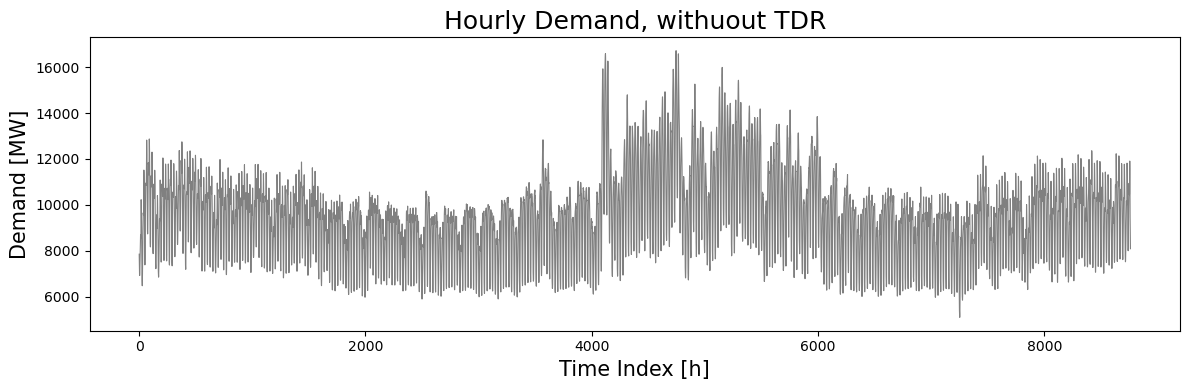

In [6]:
# Plotting with Matplotlib
plt.figure(figsize=(12, 4))

# Plot the total demand data with transparency
total_demand_data = demand_with_TDR[demand_with_TDR["Week"] == "Total"]
plt.plot(
    total_demand_data["hour"], 
    total_demand_data["MW"], 
    label="Total Demand", 
    color="gray", 
    # alpha=0.3,  # Transparency
    linewidth=0.8
)
# Customize plot
plt.title("Hourly Demand, withuout TDR", fontsize=18)
# plt.xlabel("Time Index [h]", fontsize=15)
plt.ylabel("Demand [MW]", fontsize=15)
# plt.tight_layout()

# Set x-ticks to correspond to weeks 1 through 52
weeks = range(1, 53)
plt.xticks(ticks=weeks, labels=weeks)

# Customize plot
plt.title("Hourly Demand, without TDR", fontsize=18)
plt.xlabel("Week", fontsize=15)
plt.ylabel("Demand [MW]", fontsize=15)
plt.tight_layout()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


24   [0.58039216 0.40392157 0.74117647 1.        ]


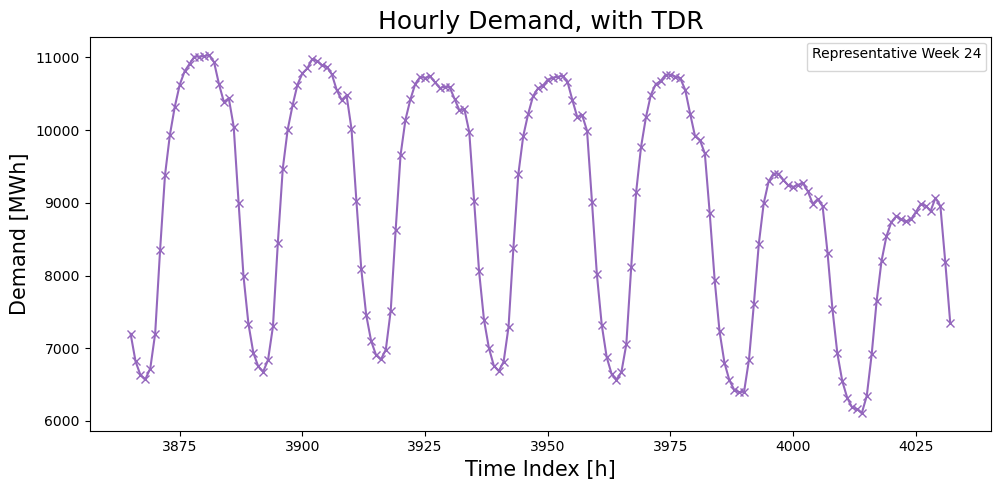

In [8]:
week_comparison = 24

# Customize plot
plt.figure(figsize=(10,5))
plt.title("Hourly Demand, with TDR", fontsize=18)
plt.xlabel("Time Index [h]", fontsize=15)
plt.ylabel("Demand [MWh]", fontsize=15)

# Place the legend in the top-right corner of the graph
plt.legend(
    title="Representative Week 24", 
    loc="upper right",  # Position legend in the top-right corner
    fontsize=8
)
plt.tight_layout()

# Plot each representative week's data on top
for week, color in zip(rep_periods, colors):
    if week == week_comparison:
        week_data = demand_with_TDR[demand_with_TDR["Week"] == week]
        plt.plot(
            week_data["hour"], 
            week_data["MW"], 
            label=f"Rep Week {week}", 
            color=color, 
            linewidth=1.5,  # Thicker line for emphasis
            marker='x',  # Add crosses at each data point
            markersize=6  # Adjust the size of the crosses
        )
        print(week, " ", color)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Placeholder for data - replace these with your actual data
Period_map = pd.read_csv(f"{case}/TDR_results/Period_map.csv", na_values="NA")  # Replace with actual Period_map data

# Initialize empty lists for reconstruction
recon = []
recon_noex = []

# Loop through 1 to 51 (inclusive)
for i in range(1, 52):
    # Get index for recon
    index = Period_map.loc[i - 1, "Rep_Period"]  # Adjusting for 0-based indexing in Python
    recon_temp = np.column_stack((
        np.repeat(index, 168),
        np.arange(168 * i - 167, 168 * i + 1),
        demand.loc[168 * index - 167:168 * index, "Demand_MW_z1"].values
    ))
    recon.append(recon_temp)
    

# Convert recon to a pandas DataFrame
recon = pd.DataFrame(
    np.vstack(recon),
    columns=["Week", "hour", "MW"]
)
recon["hour"] = recon["hour"].astype(int)
recon["MW"] = recon["MW"].astype(float)
recon["Extreme_Periods"] = ["On"] * len(recon)


# Combine or use the data as needed
print(recon.head())


   Week  hour      MW Extreme_Periods
0     4     1  8474.0              On
1     4     2  8336.0              On
2     4     3  8275.0              On
3     4     4  8330.0              On
4     4     5  8557.0              On


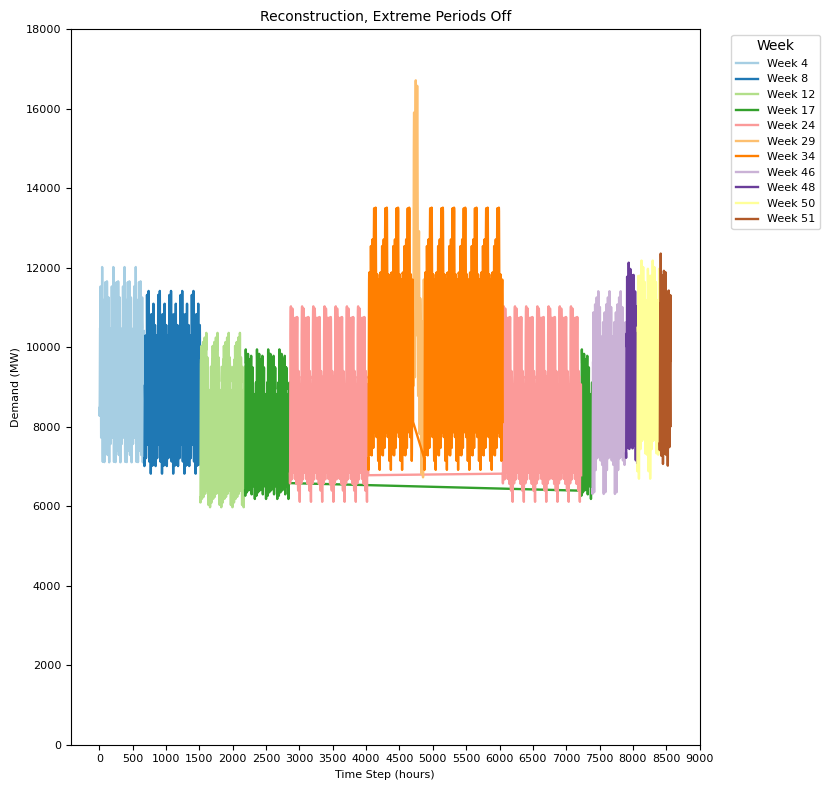

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `recon` is a pandas DataFrame

# Define a GLOBAL consistent color mapping
# List all possible weeks across datasets, ensuring consistency
all_weeks = sorted(recon["Week"].unique())  # Replace with a global list of all weeks if needed
color_palette = plt.cm.Paired(np.linspace(0, 1, len(all_weeks)))
global_color_map = {week: color for week, color in zip(all_weeks, color_palette)}  # Global mapping

# Plot setup
plt.figure(figsize=(8.45, 8))  # Equivalent to size=(845, 800) in Julia

# Plot each week as a separate line using the global color mapping
for week, week_data in recon.groupby("Week"):
    plt.plot(
        week_data["hour"],
        week_data["MW"],
        linewidth=1.7,
        color=global_color_map[week],  # Use the global consistent color for this week
        label=f"Week {week}"  # Optional: for legend
    )

# Axis formatting
plt.xticks(np.arange(0, 9001, 500), fontsize=8)
plt.yticks(np.arange(0, 18001, 2000), fontsize=8)
plt.ylim(0, 18000)
plt.xlabel("Time Step (hours)", fontsize=8)
plt.ylabel("Demand (MW)", fontsize=8)

# Title
plt.title("Reconstruction, Extreme Periods Off", fontsize=10)

# Add a legend to display colors per Week
plt.legend(title="Week", fontsize=8, loc="upper right", bbox_to_anchor=(1.2, 1))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
